# Project: Investigate a Dataset - Patient No-Shows for Medical Appointments

## Table of Contents:
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction:

The dataset chosen for this report is the "Patient No-Shows for Medical Appointments" dataset.  This dataset originated from the country of Brazil, and contains data on over one hundred thousand appointments.  It contains basic demographic data on the patients, as well as whether the patient received an SMS notification for their appointment, and whether the patient receiveda financial aid scholarship.

This dataset was created to study what factors were useful in predicting if patients would miss their appointments.  The dataset was sourced from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).

#### Questions to be explored:

1. What is the overall appointment no-show versus show rate?
2. Do men or women have more no-shows?
3. Does financial aid correlate with no-shows?
4. Is age indicative of whether a patient will make their appointments?
5. Do no-shows have a larger timeframe between schedule date and appointment date?
6. Do some days of the week have more no-shows than others?
7. Do SMS notifications coincide with fewer no-shows?
8. Which neighborhoods have more no-shows than others?

In [55]:
# Import libraries for working with data.

# Date/time manipulation library.
import datetime as dt

# Load the matplotlib visualization library.
import matplotlib.pyplot as plot

# Large array support library, including fast, high-level mathematical functions to
# manipulate the large arrays.
import numpy as np

# Flexible data structure library that enables consistent functionality.
import pandas as pd

# Load the seaborn visualization library (considered a superset of the matplotlib library).
import seaborn as sb

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling:

In this section of the report, data will be loaded, checked for cleanliness, then trimmed and cleaned ready for analysis.

### General Properties:

The data is loaded so that it can be examined to determine what changes are required to clean it for use.

In [56]:
# Load the dataset.
appointments_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

A sample of the data is data is displayed for visual inspection.

In [57]:
# Show a sample of the data.
appointments_df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


There are a number of spelling mistakes in the column names which will be corrected.  The column names themselves would benefit from being changed to something more consistent and easier to manipulate - a good option would be [snake case](https://en.wikipedia.org/wiki/Snake_case).

The structure of the dataset will be examined to determine what changes are required to data types.

In [58]:
# Display the structure of the data.
appointments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The structure check shows that there are 14 columns and 110,527 appointments. *Non-Null Count* shows that there are no missing data, since the count matches the total number of appointments.  A useful data type change would be to change the data type of the PatientId column from float64 to int64. This will stop it appearing in scientific notation, which is  not the best way to display numerical IDs. ScheduledDay and AppointmentDay will be changed to a timestamp to allow for easier manipulation. The No-show column will be converted to an int64 to make it easier to create graphs.

Three columns will be derived from the dataset - *scheduled_day_name* (name of the day on which the appointment was scheduled), *appointment_day_name* (name of the day on which the appointment occurred), and *elapsed_days* (the number of days between the day on which the appointment was scheduled and the day the appointment occurred).

Refer to the table below for a summary of these changes.

|Original Column Name:|New Column Name:|New Data Type:|
|---|---|---|
|PatientId|patient_id|int64|
|AppointmentID|appointment_id||
|Gender|gender||
|ScheduledDay|scheduled_day|timestamp|
|AppointmentDay|appointment_day|timestamp|
|Age|age||
|Neighbourhood|neighborhood||
|Scholarship|scholarship||
|Hipertension|hypertension||
|Diabetes|diabetes||
|Alcoholism|alcoholism||
|Handcap|handicap||
|SMS_received|sms_received||
|No-show|no_show||
||scheduled_day_name|object|
||appointment_day_name|object|
||elapsed_days|int64|

Determine if there are duplicates present.

In [59]:
# Determine data duplicates.
number_of_duplicates = sum(appointments_df.duplicated())
print("Duplicated entries: ", number_of_duplicates)

Duplicated entries:  0


No duplicate data exists.

Determine the number of unique patient and appointment IDs to discover if there are any NULLs present.

In [60]:
# Determine the number of unique patient and appointment IDs.
appointments_df.loc[:, ['PatientId', 'AppointmentID']].nunique()

PatientId         62299
AppointmentID    110527
dtype: int64

Based on the count of patient IDs compared with the total number of appointments it can be concluded that some patients had multiple appointments.

Determine if there are any anomalies by summarizing various statistics for the numerical columns.

In [61]:
# Summarize statistics.
appointments_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Possible outliers have been found, since the youngest person is -1 and the oldest is 115.  A swarm plot will be displayed to determine if these are outliers.

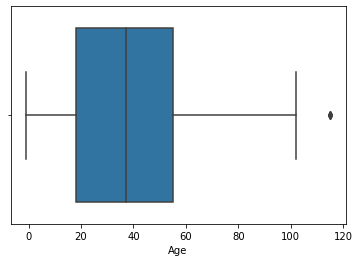

In [62]:
# Box plot of Age.
sb.boxplot(x = "Age", data = appointments_df)

# Display the graph.
plot.show()

Now that we can see that the minimum and maximum ages are outliers, we need to determine how many of these outliers exist.

In [63]:
# Show ages less than 0 or equal to 115.
appointments_df[(appointments_df["Age"] < 0) | (appointments_df["Age"] == 115)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


We can confirm that the dataset contains only 1 entry for an age of -1.  This is likely a typo in the datset and is an outlier.

There are multiple entries for the age of 115.  Knowing that there are patients with multiple appointments we can see from the PatientId that 4 of the 5 appointments for the age of 115 are actually the same patient with multiple appointments.  So, there are 2 patients who fulfill the age of 115.

This dataset was released in 2016, and so in 2021 the ages of the 115 year old patients would be 120.  According to the [list of the verified oldest people](https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people) there are no Brazilians still alive or who died in 2021 (this report was written in 2022) who match these entries.  Further evidence that these are outliers.

So, these 3 patients (6 appointments) will be removed from the dataset due to being outliers.

### Data Cleaning:

The column names will be changed and a data sample displayed to show this change.

In [64]:
# Change the column names.
appointments_df.columns = ['patient_id',
                          'appointment_id',
                          'gender',
                          'scheduled_day',
                          'appointment_day',
                          'age',
                          'neighborhood',
                          'scholarship',
                          'hypertension',
                          'diabetes',
                          'alcoholism',
                          'handicap',
                          'sms_received',
                          'no_show']

# Display a sample of the dataset to show the new column names.
appointments_df.head(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Convert the patient_id column to an int64 and a data sample will be displayed to show the change.

In [65]:
# Convert the patient_id to int64.
appointments_df.patient_id = appointments_df.patient_id.apply('int64')

# Display a sample of the dataset to show the data type conversion.
appointments_df.head(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Convert the schedule_day and appointment_day columns to timestamps and display a sample of the dataset to show the change.  Note that the time will be removed since the time level data is not used.

In [66]:
# Convert the scheduled_day to a timestamp and remove the time, leaving the date.
appointments_df['scheduled_day'] = pd.to_datetime(appointments_df['scheduled_day']).dt.date

# Convert the appointment_day to a timestamp and remove the time, leaving the date.
appointments_df['appointment_day'] = pd.to_datetime(appointments_df['appointment_day']).dt.date

# Display a sample of the dataset to show the data type conversion.
appointments_df.head(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


Change the no_show column to an int64 to enable easier graphing and display a sample of the dataset to show the change.

In [74]:
# Convert the no_show column to int64.
appointments_df['no_show'] = np.where((appointments_df.no_show == "Yes"), 1, 0)

# Display a sample of the dataset to show the data type conversion.
appointments_df.head(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_name,appointment_day_name,elapsed_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday,0 days
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,Wednesday,Friday,2 days
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,Wednesday,Friday,2 days
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0,Friday,Friday,0 days
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0,Wednesday,Friday,2 days


Create the scheduled_day_name and appointment_day_name columns and display a sample of the dataset to show the new columns.

In [71]:
# Create schedule_day_name column.
appointments_df['scheduled_day_name'] = pd.to_datetime(appointments_df['scheduled_day']).dt.day_name()

# Create appointment_day_name column.
appointments_df['appointment_day_name'] = pd.to_datetime(appointments_df['appointment_day']).dt.day_name()

# Display a sample of the dataset to show the data type conversion.
appointments_df.head(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_name,appointment_day_name
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Wednesday,Friday
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday,Friday
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday,Friday
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Friday,Friday
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Wednesday,Friday


Create the elapsed_days column and show a sample of the dataset to show the change.

In [72]:
# Create the elapsed_days column.
appointments_df['elapsed_days'] = pd.to_datetime(appointments_df['appointment_day']) - pd.to_datetime(appointments_df['scheduled_day'])

# Display a sample of the dataset to show the new column.
appointments_df.head(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_day_name,appointment_day_name,elapsed_days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0 days
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Wednesday,Friday,2 days
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday,Friday,2 days
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Wednesday,Friday,2 days
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,Friday,Friday,0 days
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,Wednesday,Friday,2 days


Delete the outliers from the dataset and display the previous box plot to confirm that the outliers have been removed.

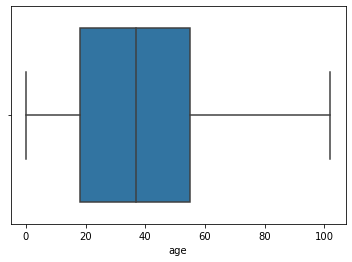

In [76]:
# Delete the outliers.
appointments_df = appointments_df[(appointments_df.age > -1) & (appointments_df.age < 115)]

# Box plot of age.
sb.boxplot(x = "age", data = appointments_df)

# Display the graph.
plot.show()

Confirm that the number of appointments has been reduced by 6.

In [78]:
# Display the data structure, including the number of appointment entries.
appointments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   patient_id            110521 non-null  int64          
 1   appointment_id        110521 non-null  int64          
 2   gender                110521 non-null  object         
 3   scheduled_day         110521 non-null  object         
 4   appointment_day       110521 non-null  object         
 5   age                   110521 non-null  int64          
 6   neighborhood          110521 non-null  object         
 7   scholarship           110521 non-null  int64          
 8   hypertension          110521 non-null  int64          
 9   diabetes              110521 non-null  int64          
 10  alcoholism            110521 non-null  int64          
 11  handicap              110521 non-null  int64          
 12  sms_received          110521 non-null  int64

As can be seen the number of entries is listed as 110,521 which is 6 less than the original number of 110,527.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!